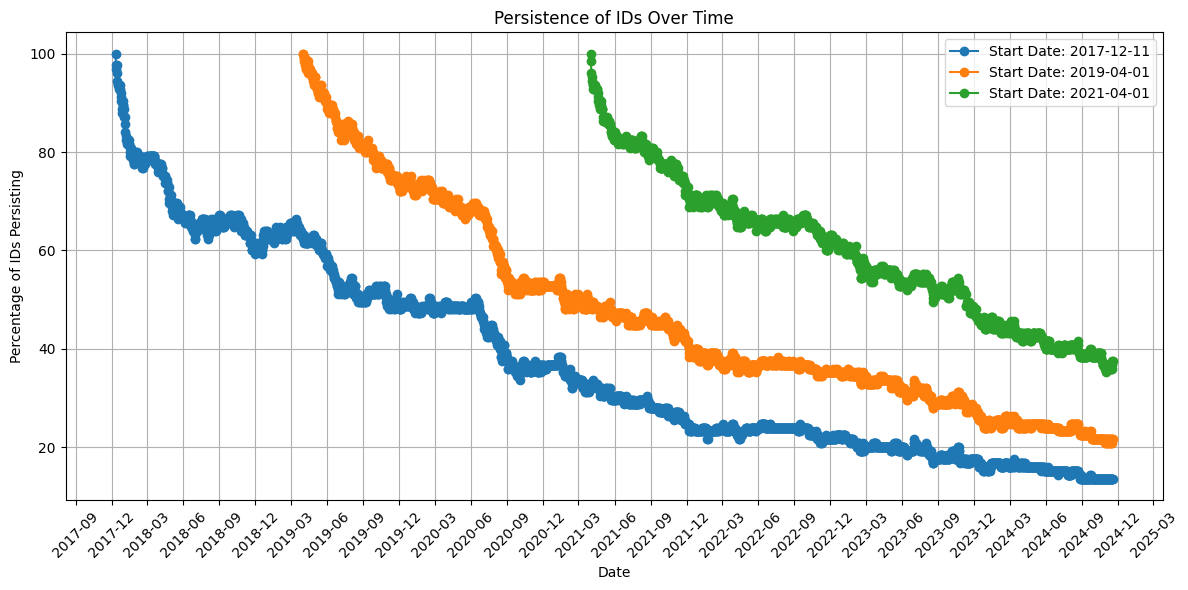

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the rotated CSV file
file_path = 'rotated_cryptocurrency_ids.csv'  # Replace with the path to your file
data = pd.read_csv(file_path, index_col='Date')

def calculate_id_persistence(data, start_dates):
    """
    Calculate the percentage of IDs from a start date that persist in the subsequent dates.

    Parameters:
        data (DataFrame): Rotated cryptocurrency data where dates are rows and ranks are columns.
        start_dates (list): List of dates to analyze persistence.

    Returns:
        persistence_data (dict): Dictionary with dates as keys and persistence percentages as values.
    """
    persistence_data = {}
    
    # Loop through each start date
    for start_date in start_dates:
        if start_date not in data.index:
            print(f"Date {start_date} not found in the dataset.")
            continue
        
        # Get the IDs for the start date
        start_ids = set(data.loc[start_date].dropna())
        
        # Initialize dictionary for the current start date
        persistence_data[start_date] = []
        
        # Loop through all subsequent dates
        for current_date in data.index:
            if current_date < start_date:
                continue
            
            # Get the IDs for the current date
            current_ids = set(data.loc[current_date].dropna())
            
            # Calculate the percentage of IDs from the start date that persist in the current date
            common_ids = start_ids & current_ids
            persistence_percentage = (len(common_ids) / len(start_ids)) * 100
            persistence_data[start_date].append((current_date, persistence_percentage))
    
    return persistence_data

def plot_persistence_multiple(persistence_data, start_dates):
    """
    Plot the persistence percentages for multiple start dates on the same chart.

    Parameters:
        persistence_data (dict): Persistence data generated by calculate_id_persistence.
        start_dates (list): List of start dates to plot.
    """
    plt.figure(figsize=(12, 6))
    
    for start_date in start_dates:
        if start_date not in persistence_data:
            print(f"No persistence data available for {start_date}. Skipping.")
            continue
        
        # Extract data for plotting
        dates, percentages = zip(*persistence_data[start_date])
        
        # Convert dates to datetime format for proper formatting
        dates = pd.to_datetime(dates)
        
        # Plot the data for this start date
        plt.plot(dates, percentages, marker='o', label=f"Start Date: {start_date}")
    
    # Format the x-axis to show every 3 months
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.xticks(rotation=45)
    
    # Add labels and legend
    plt.title("Persistence of IDs Over Time")
    plt.xlabel("Date")
    plt.ylabel("Percentage of IDs Persisting")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Define the list of dates to analyze
start_dates = ['2017-12-11', '2019-04-01', '2021-04-01']

# Calculate persistence data for the list of dates
persistence_data = calculate_id_persistence(data, start_dates)

# Plot the persistence data for all specified dates
plot_persistence_multiple(persistence_data, start_dates)